In [1]:
import numpy as np
import pandas as pd

In [2]:
data_orig = pd.read_excel("train.xlsx", 1)

In [3]:
data_orig.head()

,№ скважины,Координата X,Координата Y
0,101,6622056,504780
1,102,6621645,504916
2,103,6621857,504372
3,104,6621436,504586
4,105,6621585,505642


In [4]:
coords_dict = {}


In [5]:
for i in range(data_orig.shape[0]):
    coords_dict[str(data_orig.iloc[i, 0])] = (data_orig.iloc[i, 1], data_orig.iloc[i, 2]) 

In [6]:
coords_dict

{'101': (6622056, 504780),
 '102': (6621645, 504916),
 '103': (6621857, 504372),
 '104': (6621436, 504586),
 '105': (6621585, 505642),
 '106': (6621656, 506592),
 '107': (6621006, 504594),
 '108': (6621400, 506846),
 '109': (6620577, 504700),
 '10Р': (6621750, 507713),
 '10Рf': (6621757, 507620),
 '10РБС': (6621462, 507764),
 '110': (6620763, 505852),
 '111': (6620963, 506919),
 '112': (6620313, 505828),
 '113': (6620521, 506925),
 '114': (6620766, 508341),
 '115': (6620214, 508066),
 '116': (6620102, 507186),
 '1167': (6622916, 502636),
 '117': (6620327, 508420),
 '118': (6619450, 506183),
 '119': (6619667, 507341),
 '1199PL': (6622763, 504726),
 '1199ГС': (6622661, 504512),
 '120': (6619741, 508260),
 '121': (6619204, 506339),
 '122': (6618590, 506503),
 '1227': (6622505, 502730),
 '1228': (6622698, 503820),
 '123': (6618826, 507573),
 '124': (6618000, 507731),
 '125': (6617974, 506787),
 '1257ГС': (6622270, 502999),
 '1258PL': (6622390, 503577),
 '1258ГС': (6622371, 503556),
 '126':

In [7]:
train_data = pd.read_excel("train.xlsx", 0)
train_data.shape

(15670, 66)

In [8]:
train_data.head()

,Скважина,Дата,Характер работы,Состояние,"Время работы, ч","Нефть, т","Вода, т","Жидкость, т","Попутный газ, м3","Закачка, м3",...,Р пл,Р заб расчётное,Потери давления на трение,Р затр,Р уст,Закачка за месяц,Рпл,k,Р уст.1,Р заб
0,101,2016-12-01,НЕФ,РАБ.,744,186.44,241.84,428.28,7820,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,2016-12-01,НАГ,РАБ.,744,0.00,0.00,0.00,0,2096,...,258.0,436.472966,1.162974,195.0,196.0,2190.0,0.0,3.271276,196.0,430.412299
2,103,2016-12-01,НЕФ,РАБ.,744,554.09,399.36,953.45,23241,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,2016-12-01,НЕФ,РАБ.,744,225.65,351.29,576.94,9465,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,2016-12-01,НЕФ,РАБ.,744,953.70,284.71,1238.41,40002,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns2drop = ['Тип скважины', 'Способ эксплуатации', 'Коэффициент сепарации', 'Давление наcыщения', 
                'Газовый фактор', 'Вязкость нефти в пластовых условиях', 'Вязкость воды в пластовых условиях',
                'Вязкость жидкости в пласт. условиях', 'объемный коэффициент', 'Плотность нефти', 
                'Плотность воды', 'Радиус контура питания']

train_data = train_data.drop(columns2drop, axis = 1)

In [10]:
train_data.shape

(15670, 54)

In [11]:
import seaborn as sns

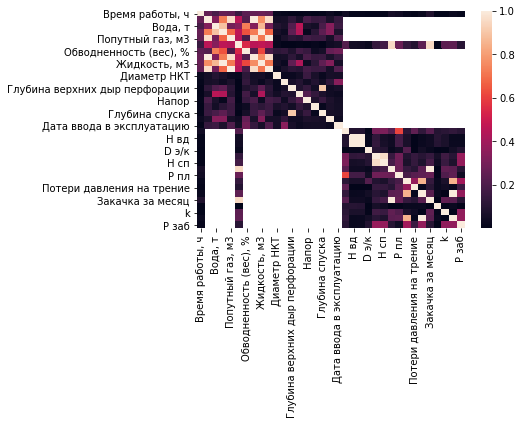

In [12]:
corr_matrix = train_data.corr().abs()

sns.heatmap(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
train_data = train_data.drop(train_data[to_drop], axis=1)

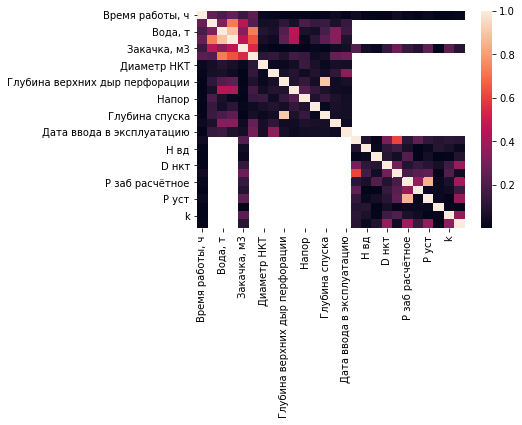

In [13]:
corr_matrix = train_data.corr().abs()

sns.heatmap(corr_matrix)

In [14]:
train_data.shape

(15670, 45)

In [15]:
len_nug = len(data_orig.groupby(by = '№ скважины')) 
months_len = len( train_data.groupby(by = 'Дата') )
len_nug

346

In [16]:
import torch

In [17]:
N_cells = 50

data_nug = torch.zeros([months_len, 1, N_cells, N_cells], dtype=torch.float32)



In [18]:
for i in range(months_len):
    data_nug[i][:][:][:] = i

In [19]:
data_dr = data_orig.drop([130, 166, 343]) 
grid_dict = {} 
ID = data_dr.iloc[:, 0] 
X = data_dr.iloc[:, 1] 
X = X - np.mean(X) 
X += 7200 
Y = data_dr.iloc[:, 2] 
Y = Y - np.mean(Y) 
Y += 7200 

num_cells = 35
Max_val = 14000 
X = X * num_cells / Max_val 
Y = Y * num_cells / Max_val 


for i in range(ID.size): 
    grid_dict[str(ID.iloc[i])] = (int(X.iloc[i]), int(Y.iloc[i])) 
grid_dict

{'101': (28, 20),
 '102': (27, 20),
 '103': (28, 19),
 '104': (27, 20),
 '105': (27, 22),
 '106': (27, 25),
 '107': (26, 20),
 '108': (27, 25),
 '109': (25, 20),
 '10Р': (28, 27),
 '10Рf': (28, 27),
 '10РБС': (27, 28),
 '110': (25, 23),
 '111': (26, 25),
 '112': (24, 23),
 '113': (25, 25),
 '114': (25, 29),
 '115': (24, 28),
 '116': (24, 26),
 '1167': (31, 15),
 '117': (24, 29),
 '118': (22, 24),
 '119': (22, 26),
 '1199PL': (30, 20),
 '1199ГС': (30, 19),
 '120': (23, 29),
 '121': (21, 24),
 '122': (20, 24),
 '1227': (30, 15),
 '1228': (30, 18),
 '123': (20, 27),
 '124': (18, 27),
 '125': (18, 25),
 '1257ГС': (29, 16),
 '1258PL': (29, 17),
 '1258ГС': (29, 17),
 '126': (22, 23),
 '127': (22, 29),
 '1287': (28, 15),
 '1288': (29, 18),
 '1289': (29, 21),
 '1290': (26, 23),
 '12Р': (22, 27),
 '1318PL': (29, 17),
 '1318ГС': (29, 17),
 '1319PL': (30, 19),
 '1319ГС': (29, 19),
 '1347': (28, 17),
 '1348': (28, 18),
 '1349': (28, 21),
 '1350': (27, 21),
 '1379': (27, 20),
 '1380PL': (28, 22),
 

In [20]:
N_cells = 50

data_nug = torch.zeros([months_len, 1, N_cells, N_cells], dtype=torch.float32)
train_data

,Скважина,Дата,Характер работы,Состояние,"Время работы, ч","Нефть, т","Вода, т","Жидкость, т","Закачка, м3","Обводненность (вес), %",...,D э/к,D нкт,Р пл,Р заб расчётное,Потери давления на трение,Р затр,Р уст,Рпл,k,Р заб
0,101,2016-12-01,НЕФ,РАБ.,744,186.44,241.84,428.28,0,56.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,2016-12-01,НАГ,РАБ.,744,0.00,0.00,0.00,2096,0.0,...,146.8,73.000000,258.0,436.472966,1.162974,195.0,196.0,0.0,3.271276,430.412299
2,103,2016-12-01,НЕФ,РАБ.,744,554.09,399.36,953.45,0,41.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,2016-12-01,НЕФ,РАБ.,744,225.65,351.29,576.94,0,60.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,2016-12-01,НЕФ,РАБ.,744,953.70,284.71,1238.41,0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,107,2016-12-01,НЕФ,РАБ.,744,701.56,205.10,906.66,0,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,109,2016-12-01,НЕФ,РАБ.,744,185.90,110.22,296.11,0,37.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10РБС,2016-12-01,НЕФ,РАБ.,744,1457.85,950.67,2408.53,0,39.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,110,2016-12-01,НЕФ,РАБ.,744,564.79,1017.10,1581.89,0,64.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1167,2016-12-01,НАГ,РАБ.,744,0.00,0.00,0.00,8238,0.0,...,149.0,66.780105,275.0,395.191312,7.737538,29.0,158.0,0.0,5.193178,427.490142


In [21]:
date_len = len(train_data.drop_duplicates('Дата')['Дата'])

date_dict = {}
for i in range(date_len):
    date_dict.update({str(train_data.drop_duplicates('Дата')['Дата'].iloc[date_len - (1 + i)]) : i})
                                                         

In [22]:
print(str(train_data.drop_duplicates('Дата')['Дата'].iloc[0]) )

2016-12-01 00:00:00


In [23]:
data_corr = pd.read_excel("train.xlsx", 0)

data_corr["Month"] = pd.Series(np.zeros(data_corr.shape[0]))
data_corr.shape
date = data_corr.iloc[0, 1]
for i in range(data_corr.shape[0]):
    data_corr.loc[i, "Month"] = (data_corr.loc[i, "Дата"].year - 2006) * 12 + data_corr.loc[i, "Дата"].month - 9
 

In [24]:
data_corr.head()

,Скважина,Дата,Характер работы,Состояние,"Время работы, ч","Нефть, т","Вода, т","Жидкость, т","Попутный газ, м3","Закачка, м3",...,Р заб расчётное,Потери давления на трение,Р затр,Р уст,Закачка за месяц,Рпл,k,Р уст.1,Р заб,Month
0,101,2016-12-01,НЕФ,РАБ.,744,186.44,241.84,428.28,7820,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0
1,102,2016-12-01,НАГ,РАБ.,744,0.00,0.00,0.00,0,2096,...,436.472966,1.162974,195.0,196.0,2190.0,0.0,3.271276,196.0,430.412299,123.0
2,103,2016-12-01,НЕФ,РАБ.,744,554.09,399.36,953.45,23241,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0
3,104,2016-12-01,НЕФ,РАБ.,744,225.65,351.29,576.94,9465,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0
4,105,2016-12-01,НЕФ,РАБ.,744,953.70,284.71,1238.41,40002,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0


In [25]:
# print(grid_dict[][0])

SyntaxError: invalid syntax (<ipython-input-25-7f72c09bfff1>, line 1)

In [26]:
for index, row in data_corr[data_corr['Характер работы'] == 'НАГ'].iterrows():
    str_skv = str(row['Скважина'])
    data_nug[ int(row['Month']) ][0][ grid_dict[ str_skv ][0] ][ grid_dict[ str_skv ][1] ] += row['Закачка, м3']
    
data_nug.sum(dim=(2, 3))

tensor([[     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [     0.],
        [  9905.],
        [ 16044.],
        [ 17631.],
        [ 20951.],
        [ 16605.],
        [ 19299.],
        [ 18180.],
        [ 24602.],
        [ 26070.],
        [ 30634.],
        [ 29002.],
        [ 36686.],
        [ 36122.],
        [ 37227.],
        [ 36558.],
        [ 32557.],
        [ 29345.],
        [ 47521.],
        [ 60742.],
        [ 61747.],
        [ 61209.],
        [ 66237.],
        [ 67365.],
        [ 60548.],
        [ 60830.],
        [ 67556.],
        [ 68883.],
        [ 71

In [27]:
torch.save(data_nug, "injection1div3")